<a href="https://colab.research.google.com/github/jwoo13/Computer1/blob/main/3_%EC%A7%91%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. 간단한 집합 연산

s1 = set([1,2,3])
print (s1)
s2=set([2,3,4])
print (s2)

print (s1 & s2)
print (s1 | s2)
print (s1 - s2)

{1, 2, 3}
{2, 3, 4}
{2, 3}
{1, 2, 3, 4}
{1}


In [11]:
# 두 은행의 고객 집합 선언
bankA_customers = set(["김철수", "이영희", "박민수", "최지우"])
bankB_customers = set(["이영희", "최지우", "정우성", "한지민"])

print("은행 A 고객:", bankA_customers)
print("은행 B 고객:", bankB_customers)

# 두 은행의 전체 고객 집합 (합집합)
total_customers = bankA_customers | bankB_customers
print("합병 후 전체 고객:", total_customers)

# 두 은행 모두에 있는 공통 고객 (교집합)
common_customers = bankA_customers & bankB_customers
print("공통 고객:", common_customers)

# A 은행에만 있는 고객 (차집합)
only_A_customers = bankA_customers - bankB_customers
print("A 은행에만 있는 고객:", only_A_customers)

# B 은행에만 있는 고객 (차집합)
only_B_customers = bankB_customers - bankA_customers
print("B 은행에만 있는 고객:",only_B_customers)


은행 A 고객: {'박민수', '이영희', '최지우', '김철수'}
은행 B 고객: {'이영희', '정우성', '한지민', '최지우'}
합병 후 전체 고객: {'박민수', '정우성', '이영희', '최지우', '한지민', '김철수'}
공통 고객: {'이영희', '최지우'}
A 은행에만 있는 고객: {'박민수', '김철수'}
B 은행에만 있는 고객: {'정우성', '한지민'}


In [13]:
import numpy as np

# 12가지 파버카스텔 색연필 색상 집합 (RGB 값 예시)
faber_castell_colors = {
"White": (255, 255, 255),
"Black": (0, 0,0),
"Brown": (150, 75, 0),
"Orange": (255, 127, 0),
"Red": (255, 0, 0),
"Yellow": (255, 255, 0),
"Light Green": (0, 255, 0),
"Green": (0, 128, 0),
"Light Blue": (0, 255, 255),
"Blue": (0, 0, 255),
"Purple": (128, 0, 128),
"Pink": (255, 192, 203)
}
# 입력 색상 (예: 사용자 입력값)
input_color = (120, 100, 200) # 예를 들어 보라색 계열

                         # 입력 색상 (예: 사용자 입력값)
input_color = (120, 100, 200) # 예를 들어 보라색 계열

def find_nearest_color(input_rgb, color_set):
    min_dist = float('inf')
    nearest_name = None
    for name, rgb in color_set.items():
        # 유클리드 거리 계산
        dist = np.sqrt(sum((a - b) ** 2 for a, b in zip(input_rgb, rgb)))
        if dist < min_dist:
            min_dist = dist
            nearest_name = name
    return nearest_name, color_set[nearest_name]

nearest_name, nearest_rgb = find_nearest_color (input_color, faber_castell_colors)

print(f"입력 색상: {input_color}")
print(f"가장 가까운 파버카스텔 색상: {nearest_name}, RGB: {nearest_rgb}")

입력 색상: (120, 100, 200)
가장 가까운 파버카스텔 색상: Purple, RGB: (128, 0, 128)


In [17]:
# Colab 환경: 필요한 라이브러리 설치
!pip install pillow numpy matplotlib
# 라이브러리 import
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving kj0WNibo644fDgPtsCdQbb1zEJMaAArhyo0OaM3GjtrjeMXkOb5usIxEyCdAyMLr3Cn8B8IToER7Sifrqb3VIA.webp to kj0WNibo644fDgPtsCdQbb1zEJMaAArhyo0OaM3GjtrjeMXkOb5usIxEyCdAyMLr3Cn8B8IToER7Sifrqb3VIA.webp


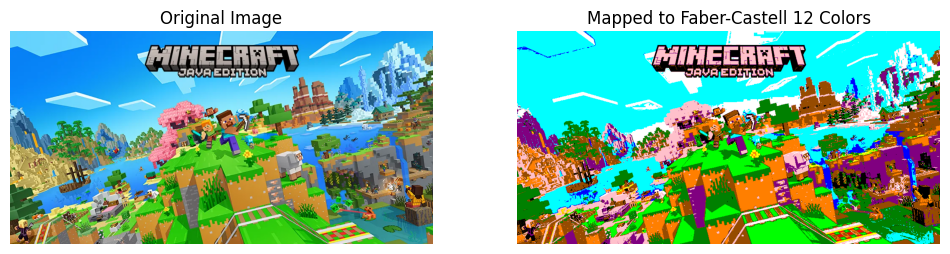

In [19]:
# 파버카스텔 색연필 12색 (RGB 근사값)
faber_castell_colors = {
"White": (255, 255, 255),
"Black": (0, 0, 0),
"Brown": (150, 75, 0),
"Orange": (255, 127, 0),
"Red": (255, 0, 0),
"Yellow": (255, 255, 0),
"Light Green": (0, 255, 0),
"Green": (0, 128, 0),
"Light Blue": (0, 255, 255),
"Blue": (0, 0, 255),
"Purple": (128, 0, 128),
"Pink": (255, 192, 203)
}
# 가장 가까운 색상 찾기 함수
def find_nearest_color(pixel, color_set):
    min_dist = float('inf')
    nearest_rgb = (0, 0, 0)
    for rgb in color_set.values():
        dist = np.linalg.norm(np.array(pixel) - np.array(rgb))
        if dist < min_dist:
            min_dist = dist
            nearest_rgb = rgb
    return nearest_rgb
# 파일 업로드
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
# 이미지 열기
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)
# 출력용 배열 초기화
output_np = np.zeros_like(image_np)
# 픽셀 단위로 색상 변환
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        output_np[i, j] = find_nearest_color(image_np[i, j], faber_castell_colors)
# 변환 결과 이미지
output_image = Image.fromarray(output_np)
# 원본과 변환 이미지를 함께 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(output_image)
axs[1].set_title("Mapped to Faber-Castell 12 Colors")
axs[1].axis("off")
plt.show()

In [20]:
# Colab 환경: 필요한 라이브러리 설치
!pip install pillow numpy matplotlib scikit-image

In [22]:
# 라이브러리 import
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from google.colab import files
# 파버카스텔 색연필 12색 (RGB 근사값)
faber_castell_colors = {
"White": (255, 255, 255),
"Black": (0, 0, 0),
"Brown": (150, 75, 0),
"Orange": (255, 127, 0),
"Red": (255, 0, 0),
"Yellow": (255, 255, 0),
"Light Green": (0, 255, 0),
"Green": (0, 128, 0),
"Light Blue": (0, 255, 255),
"Blue": (0, 0, 255),
"Purple": (128, 0, 128),
"Pink": (255, 192, 203)
}
# LAB 색상으로 미리 변환
faber_lab_colors = {}
for name, rgb in faber_castell_colors.items():
  # RGB → [0,1] 범위로 정규화
  rgb_norm = np.array(rgb).reshape(1, 1, 3) / 255.0
  lab = color.rgb2lab(rgb_norm)[0, 0]
  faber_lab_colors[name] = lab